# Theano

- описываем математическое выражение
- компилируем выражение (CPU или GPU)
- запускаем


Синнтаксис чем-то напоминает *NumPy*. Выражение можно описать с помощью переменных следующих типов:
- скаляры *theano.tensor.scalar*
- векторы *theano.tensor.vector*
- матрицы *theano.tensor.matrix*


In [2]:
import numpy as np
import scipy as sp
import theano
import theano.tensor as T
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.datasets as ds

%matplotlib inline

#### Переменные

In [3]:
#x = T.vector('x', dtype=theano.config.floatX)
x = T.scalar()
z = T.scalar()
y  = x ** 2 + x + z

In [4]:
y.eval({x: 5, z: 2})

array(32.0, dtype=float32)

Выражение описывается символьно, таким образом мы можем вычислить градиент выражения по набору переменных:

In [5]:
grad_y_x = T.grad(y, x)
grad_y_x.eval({x: 10, z: 2})

array(21.0, dtype=float32)

In [7]:
dtype = theano.config.floatX

W = T.matrix()
D = T.matrix()
V = T.vector()
Z = T.dot(W, D) + W**2 + T.exp(D) + T.dot(W, V)

Z.eval({ 
    W: np.array([[2, 2], [2, 2]], dtype=dtype),
    D: np.array([[3, 3], [3, 3]], dtype=dtype), 
    V: np.array([1, 5], dtype=dtype) })

array([[ 48.08553696,  48.08553696],
       [ 48.08553696,  48.08553696]], dtype=float32)

#### Типы данных

Из-за особенностей архитектуры некоторых GPU,  операции с 32-разрядными (*float32*) числами с плавающей точкой могут выполнятся намного быстрее, чем с 64-разрядными (*float64*). Таким образом рекомендуется явно указывать тип и имя переменной, что полезно при отладке:

In [8]:
W = T.matrix('W', dtype=theano.config.floatX)
x = T.scalar('x', dtype=theano.config.floatX)

Конкретный тип для *theano.config.floatX* можно указать в конфигурационном файле theano.

Можно распечатать символьное представление выражения:

In [9]:
theano.pprint(x ** 2 + x)

'((x ** TensorConstant{2}) + x)'

Пакет *theano.tensor* содержит оргомное число конструкторов переменных: 

| Constructor | dtype      | ndim | shape     |
|-------------|------------|------|-----------|
| bscalar     | int8       | 0    | ()        |
| bvector     | int8       | 1    | (?,)      |
| brow        | int8       | 2    | (1,?)     |
| bcol        | int8       | 2    | (?,1)     |
| bmatrix     | int8       | 2    | (?,?)     |
| wscalar     | int16      | 0    | ()        |
| wvector     | int16      | 1    | (?,)      |
| wrow        | int16      | 2    | (1,?)     |
| wcol        | int16      | 2    | (?,1)     |
| wmatrix     | int16      | 2    | (?,?)     |
| wtensor3    | int16      | 3    | (?,?,?)   |
| wtensor4    | int16      | 4    | (?,?,?,?) |
| iscalar     | int32      | 0    | ()        |
| ivector     | int32      | 1    | (?,)      |
| irow        | int32      | 2    | (1,?)     |
| icol        | int32      | 2    | (?,1)     |
| imatrix     | int32      | 2    | (?,?)     |
| itensor3    | int32      | 3    | (?,?,?)   |
| itensor4    | int32      | 4    | (?,?,?,?) |
| lscalar     | int64      | 0    | ()        |
| lvector     | int64      | 1    | (?,)      |
| lrow        | int64      | 2    | (1,?)     |
| lcol        | int64      | 2    | (?,1)     |
| lmatrix     | int64      | 2    | (?,?)     |
| dscalar     | float64    | 0    | ()        |
| dvector     | float64    | 1    | (?,)      |
| drow        | float64    | 2    | (1,?)     |
| dcol        | float64    | 2    | (?,1)     |
| dmatrix     | float64    | 2    | (?,?)     |
| fscalar     | float32    | 0    | ()        |
| fvector     | float32    | 1    | (?,)      |
| frow        | float32    | 2    | (1,?)     |
| fcol        | float32    | 2    | (?,1)     |
| fmatrix     | float32    | 2    | (?,?)     |
| cscalar     | complex64  | 0    | ()        |
| cvector     | complex64  | 1    | (?,)      |
| crow        | complex64  | 2    | (1,?)     |
| ccol        | complex64  | 2    | (?,1)     |
| cmatrix     | complex64  | 2    | (?,?)     |
| zscalar     | complex128 | 0    | ()        |
| zvector     | complex128 | 1    | (?,)      |
| zrow        | complex128 | 2    | (1,?)     |
| zcol        | complex128 | 2    | (?,1)     |
| zmatrix     | complex128 | 2    | (?,?)     |

#### Shared variables

Значение переменной можо задать явно, если например она присутствует в нескольких назависимых выражениях. Так же операции копирования между основной памятью и памятью GPU не бесплатна,  в таком случае можно использовать shared variables, это некоторый аналог глобальных переменных. Тип переменной определяется при инициализации:

In [10]:
X = T.matrix()
shared = theano.shared(
                  np.array([[1, 2], 
                            [3, 4]], dtype=dtype))
W = T.dot(X, shared)
W.eval( { X: np.array([[2, 2], [3, 3]], dtype=dtype) })

array([[  8.,  12.],
       [ 12.,  18.]], dtype=float32)

In [11]:
shared.set_value(np.array([[5, 5], 
                          [5, 5]], dtype=dtype))
W.eval( { X: np.array([[2, 2], [3, 3]], dtype=dtype) })

array([[ 20.,  20.],
       [ 30.,  30.]], dtype=float32)

#### Функции 

Для удобства можно определить функцию, которая вызываются также, как и обычная функция Python:

In [12]:
x = T.dscalar()
y = T.dscalar()
shared = theano.shared(5.)

foo = theano.function(inputs=[x, y], outputs=x**2 + y + shared)
foo(2, 3)

array(12.0)

**inputs** - символы, которые будут параметрами

**outputs** - выражение, которое будет вычисляться в качестве значения функции

В графе выражения можно подменить какие-то символы с помощью параметра **givens**:

In [13]:
x = T.dscalar()
y = T.dscalar()
shared = theano.shared(5.)

foo = theano.function(inputs=[x], 
                      outputs=x**2 + y + shared, 
                      givens={ y: 5., shared: 5.}
)

foo(2.)

array(14.0)

Иногда после вычисления функции нужно обновить какое-то глобальное состояние. В этом случае можно использовать параметр **updates**. В качестве ключа - shared variable, в качестве значения - какое-то выражение, все переменные в котором определены. Shared Variables будут обновлены после каждого вызова функции. 

In [17]:
x = T.dscalar()
y = T.dscalar()
shared = theano.shared(5.)

foo = theano.function(inputs=[x], 
                      outputs=x**2 + y + shared, 
                      givens={y: 5.},
                      updates={shared: shared + x}, 
)

foo(2)

array(14.0)

In [18]:
foo(2)

array(16.0)

### Пример: логистисеская регрессия

Будем решать задачу бинарной классификации. Пусть у нас тренировочное множество $$T^l =\{(x_i, y_i)\}_{i=1}^{l}$$ где 
$x_i \in \mathbb R^n$, $y=\{0, 1\}$

Функция классификации: $$a(x)=\sigma(x \cdot W + b)=\frac{1}{1 + e^{-x \cdot W + b}}$$

где $x \in \mathbb R^n$,  $W$ - матрица размером $(n, 1)$, $b \in \mathbb R$ 

Функция потерь:
$$Q(\theta) = \sum_{(x_i, y_i) \in T^l}{-{y_i} \log (\sigma(x_i \cdot W + b)) - (1-y_i) \log (1-\sigma(x_i \cdot W + b))} \to min_{W, b}$$

То есть нам нужно найти такую матрицу $W$ (матрица из  одного столбца) и число $b$, чтобы минимизировать означенную функцию.

Будем распознавать рукописные цифры "0" и "1":

In [19]:
X, Y = ds.load_digits(n_class=2, return_X_y=True)

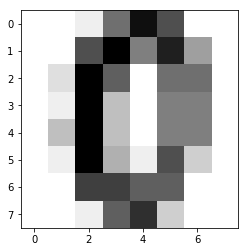

In [20]:
plt.imshow(X[2].reshape((8, 8)), cmap=plt.cm.gray_r)

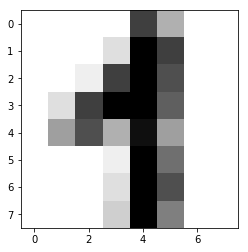

In [21]:
plt.imshow(X[8].reshape((8, 8)), cmap=plt.cm.gray_r)

Выделим тестовое и тренировочное множество

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

Определим все интересующие нас символы

In [23]:
#размер тренировочного мноества
num_samples = len(Y_train)
#число признаков
num_features = X_train.shape[1]

# разделяемые переменные с тестовым множеством
s_X_test = theano.shared(X_test)
s_Y_test = theano.shared(Y_test.reshape((-1, 1)))

# разделяемые переменные с тренировочным множеством
s_X_train = theano.shared(X_train)
s_Y_train = theano.shared(Y_train.reshape((-1, 1)))

# соответствующие символы
t_X = T.dmatrix('X')
t_Y = T.matrix('Y', dtype='int64')

# параметры модели
W = theano.shared(np.random.randn(num_features, 1))
b = theano.shared(0.)

Определим результат классификации

In [24]:
result = T.nnet.sigmoid(T.dot(t_X, W) + b)

и функцию потерь, не забудем регулизатор

In [25]:
cost = -T.mean(t_Y * T.log(result) + (1. - t_Y) * T.log(1. - result)) + T.sum(W ** 2)

найдем градиенты $\frac{\partial cost}{\partial W}$ и $\frac{\partial cost}{\partial b}$

In [26]:
grad_W = T.grad(cost, W)
grab_b = T.grad(cost, b)

Будем искать минимум обыкновенным градиентным спуском. Определим функцию **update**, которая обновляет состояние $W$ и $b$, вместо **t_X** и **t_Y** подставим тренировочные данные. Здес же определим  функцию **error**, которая будет считать ошибку на тестовых данных.

In [27]:
a = 0.1

update = theano.function(
    inputs=[],
    outputs=cost,
    givens={t_X: s_X_train, 
            t_Y: s_Y_train },
    updates=[(W, W - 0.01 * grad_W), 
             (b, b - 0.01 * grab_b)]
)

error = theano.function(
    inputs=[],
    givens={t_X: s_X_test, 
            t_Y: s_Y_test},
    outputs=T.mean(T.eq(result >= 0.5, t_Y))
)

Запустим градиентный спуск на 1000 итерациях (не стоит так делать на практике, алгоритм минимизации сильно упрощен).

In [28]:
for epoch in range(1000):
    cost_value = update()
    error_value = error()
    
    if epoch % 100 == 0:
        print(cost_value, error_value)

109.48250101184121 0.5
1.170565278277314 1.0
0.08588492767225332 1.0
0.07003050363602291 1.0
0.06977946661856407 1.0
0.06977424818832866 1.0
0.0697730443165628 1.0
0.0697719095777791 1.0
0.06977077845395584 1.0
0.06976964984041883 1.0


Наконец определим функцию, которая будет классифицировать произвольный объект $x$

In [29]:
predict = theano.function(inputs=[t_X], outputs=result >= 0.5)

In [30]:
predict(X[2].reshape((1, -1)))

array([[False]], dtype=bool)

In [31]:
predict(X[8].reshape((1, -1)))

array([[ True]], dtype=bool)